# Support Vector Machine

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week 03 - Machine Learning Algorithms/2- SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

This explaination is taken from [Datacamp.com](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python#how)

Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
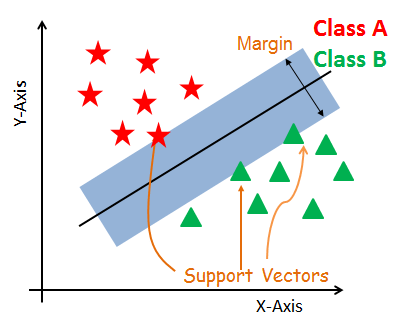


### Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

### Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.




### How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1.Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2.Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.
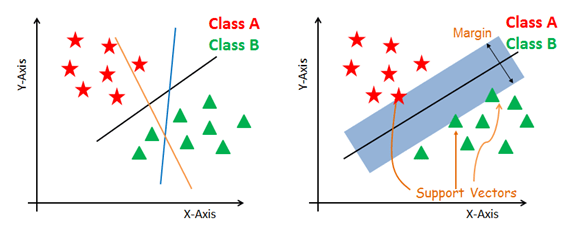



## SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

### Linear Kernel 
A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

`K(x, xi) = sum(x * xi)`

### Polynomial Kernel 
A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

`K(x,xi) = 1 + sum(x * xi)^d`

Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

### Radial Basis Function Kernel 
The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.


`K(x,xi) = exp(-gamma * sum((x – xi^2))`

Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.



## Tuning Hyperparameters

**Kernel**: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

**Regularization**: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

**Gamma**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.


We can summarize the effect of $C$ and $\gamma$ in the following table

|         | Large Gamma           | Small Gamma | Large C           | Small C  |
| ------------- |:-------------:| -----:| -----:| -----:|
| Variance      | Low | High | High | Low | 
| Bias      | High      |   Low | Low | High | 

As a reminder, this is what the bias and variance look like

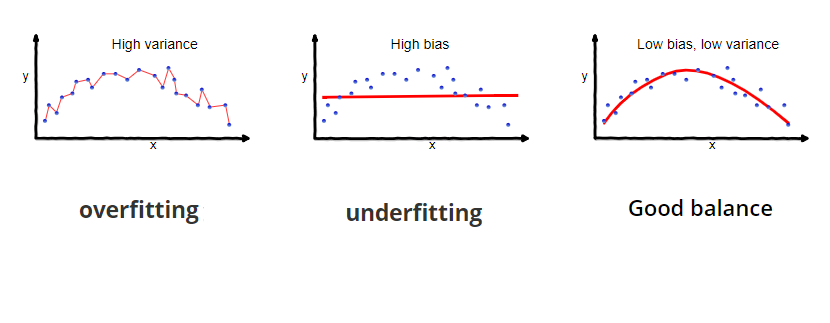



## Scikit Learn Implementation

### SVM Classifier using SVC

Until now, you have learned about the theoretical background of SVM. Now you will learn about its implementation in Python using scikit-learn.

In the model the building part, you can use the cancer dataset, which is a very famous multi-class classification problem. This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset comprises 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).

This data has two types of cancer classes: malignant (harmful) and benign (not harmful). Here, you can build a model to classify the type of cancer. The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library.



#### Import Libs


In [ ]:
from sklearn import datasets, model_selection, svm, metrics
import pandas as pd

#### Loading Data


In [ ]:
x, y = datasets.load_breast_cancer(return_X_y=True)

#### Splitting Data


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)  # 80% training and 20% test

#### Creating Model 

In [ ]:
# Create a svm Classifier
clf = svm.SVC(kernel="linear")  # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating Model

In [ ]:
metrics.f1_score(y_test, y_pred)

0.9659863945578231

### SVM Regressor using SVR

#### Loading Data

In [ ]:
x, y = datasets.fetch_california_housing(
    return_X_y=True
)  # this will download the dataset so it might take some time


x_mean = x.mean()  # calculate the mean of x
x_std = x.std()  # calculate the std of x

x_norm = (x - x_mean) / x_std  # normalize the x


y_mean = y.mean()  # calculate the mean of y
y_std = y.std()  # calculate the std of y

y_norm = (y - y_mean) / y_std  # normalize the y

#### Splitting Data

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y_norm, test_size=0.2, random_state=42
)

#### Creating Model


In [ ]:
model = svm.SVR()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#### Evaluating Model


In [ ]:
metrics.mean_squared_error(y_test, y_pred)

0.9960435093953228